# Melakukan import library yang dibutuhkan

In [3]:
import pandas as pd
import seaborn as sns

# Melakukan penggabungan dataset yang telah di scrape dari blibli, tokopedia, dan bukalapak dengan kata kunci "iphone 15 pro max"

In [4]:
data_directory = 'data/'

blibli = data_directory + 'blibli.xlsx'
bukalapak = data_directory + 'bukalapak.xlsx'
tokopedia = data_directory + 'tokopedia.xlsx'

blibli_df = pd.read_excel(blibli)
bukalapak_df = pd.read_excel(bukalapak)
tokopedia_df = pd.read_excel(tokopedia)

blibli_df['source'] = 'blibli'
bukalapak_df['source'] = 'bukalapak'
tokopedia_df['source'] = 'tokopedia'

df = pd.concat([blibli_df, bukalapak_df, tokopedia_df], ignore_index=True)

# Melihat jumlah kolom yang bersisi data pada dataset yang telah digabungkan

In [6]:
df.count()

ID              6528
Category        6528
Brand           6155
Product Name    6528
Price           6528
Image URL       6528
Rating          4895
source          6528
dtype: int64

# Melakukan penghapusan data yang memiliki nilai kosong pada seluruh kolom dan melihat kembali jumlah kolom yang bersisi data

In [7]:
df = df.dropna()
df.count()

ID              4522
Category        4522
Brand           4522
Product Name    4522
Price           4522
Image URL       4522
Rating          4522
source          4522
dtype: int64

# Menampilkan dataset saat ini dengan jumlah 12239 baris dan 8 kolom

In [8]:
df

,ID,Category,Brand,Product Name,Price,Image URL,Rating,source
0,APF-70017-00313,Handphone & Tablet,Apple,iPhone 15 Pro Max,23249000,https://www.static-src.com/wcsstore/Indraprast...,4.9,blibli
1,APF-70017-00339,Handphone & Tablet,Apple,iPhone 15 Pro Max Silicone Case,999000,https://www.static-src.com/wcsstore/Indraprast...,5.0,blibli
2,APF-70017-00310,Handphone & Tablet,Apple,iPhone 15 Pro,18999000,https://www.static-src.com/wcsstore/Indraprast...,4.9,blibli
3,APF-70017-00306,Handphone & Tablet,Apple,iPhone 15 Plus,15999000,https://www.static-src.com/wcsstore/Indraprast...,4.9,blibli
4,APF-70017-00335,Handphone & Tablet,Apple,iPhone 15 Pro Max Clear Case with MagSafe,999000,https://www.static-src.com/wcsstore/Indraprast...,5.0,blibli
...,...,...,...,...,...,...,...,...
6241,12162757113,Handphone & Tablet,whozzystore,IPHONE 15 PRO MAX ( GARANSI IBOX ),25000000,https://images.tokopedia.net/img/cache/200-squ...,5.0,tokopedia
6328,12641088290,Handphone & Tablet,ClassikShop,iphone 15 pro max,27000000,https://images.tokopedia.net/img/cache/200-squ...,5.0,tokopedia
6382,12400122693,Handphone & Tablet,bungadesadigital,Apple iphone 15 Pro/Pro Max 64GB/128GB/256GB F...,3930000,https://images.tokopedia.net/img/cache/200-squ...,5.0,tokopedia
6455,11947075321,Handphone & Tablet,PAS ONLINE ID,IPHONE 15 PRO MAX GARANSI RESMI APPLE INDONESI...,22999000,https://images.tokopedia.net/img/cache/200-squ...,5.0,tokopedia


# Mencari produk dengan harga termahal dari masing-masing marketplace

Dapat dilihat untuk kata kunci "iphone 15 pro max", produk dengan harga termahal ada di bukalapak dengan harga Rp 40.879.000, sedangkan tokopedia menempati posisi kedua dengan harga Rp 40.000.000 dan blibli menempati posisi ketiga dengan harga Rp 23.249.000

In [9]:
df.loc[df[df['Product Name'].str.contains('iphone 15 pro max', case=False)].groupby('source')['Price'].idxmax()]

,ID,Category,Brand,Product Name,Price,Image URL,Rating,source
0,APF-70017-00313,Handphone & Tablet,Apple,iPhone 15 Pro Max,23249000,https://www.static-src.com/wcsstore/Indraprast...,4.9,blibli
3885,4hs38pp,Power Bank,-,Ready Apple Iphone 15 Pro Max 256 Gb 512 Gb 1 ...,40879000,https://s1.bukalapak.com/img/13157165203/large...,0.0,bukalapak
5859,13091583863,Handphone & Tablet,Digi Face,iPhone 15 Pro Max 1TB PLATINUM,40000000,https://images.tokopedia.net/img/cache/200-squ...,5.0,tokopedia


# Mencari produk dengan harga termurah dari masing-masing marketplace

Dapat dilihat untuk produk dengan kata kunci "iphone 15 pro max", pada ketiga marketplace bukan merupakan produk "iphone 15 pro max" sebenarnya melainkan aksesoris dari produk "iphone" seperti case, charger, adapter, headset, dll

In [10]:
df.loc[df[df['Product Name'].str.contains('iphone 15 pro max', case=False)].groupby('source')['Price'].idxmin()]

,ID,Category,Brand,Product Name,Price,Image URL,Rating,source
1,APF-70017-00339,Handphone & Tablet,Apple,iPhone 15 Pro Max Silicone Case,999000,https://www.static-src.com/wcsstore/Indraprast...,5.0,blibli
2515,4hsaw6j,Screen Guard,['Merk Lain'],Tempered Glass Full Lem Iphone 15 Pro Max 15Pr...,5000,https://s4.bukalapak.com/img/48252236203/large...,0.0,bukalapak
4620,11795104182,Handphone & Tablet,FIFOJAM,Dummy iPhone 15 Pro Max 1:1 Black Screen HP Bu...,174440,https://images.tokopedia.net/img/cache/200-squ...,4.9,tokopedia


Karena harga termurah didominasi oleh aksesoris , maka diperlukan untuk melakukan filter menggunakan beberapa kata umum yang digunakan untuk aksesoris demi mednapatkan hasil yang benar.

setelah dilakukan filtrasi maka dapat dilihat harga termurah untuk keyword "iphone 15 pro max" adalah Rp 1.300.000 dengan rating 5.0 pada platform tokopedia, dan diposisi kedua adalah bukalapak dengan harga Rp 10.500.000 dengan rating 5.0 dan posisi ketiga adalah blibli dengan harga Rp 23.249.000 dengan rating 4.9

In [36]:
df.loc[df[~df['Product Name'].str.contains('screen', case=False) & ~df['Product Name'].str.contains('bank', case=False) & ~df['Product Name'].str.contains('camera', case=False) & ~df['Product Name'].str.contains('protector', case=False) & ~df['Product Name'].str.contains('speaker', case=False) & ~df['Product Name'].str.contains('cage', case=False) & ~df['Product Name'].str.contains('charger', case=False) & ~df['Product Name'].str.contains('skin', case=False) & ~df['Product Name'].str.contains('converter', case=False) & ~df['Product Name'].str.contains('cable', case=False) & ~df['Product Name'].str.contains('kaca', case=False) & ~df['Product Name'].str.contains('box', case=False) & ~df['Product Name'].str.contains('pelindung', case=False) & ~df['Product Name'].str.contains('ceramic', case=False) & ~df['Product Name'].str.contains('ring', case=False) & ~df['Product Name'].str.contains('bening', case=False) & ~df['Product Name'].str.contains('jack', case=False) & ~df['Product Name'].str.contains('kabel', case=False) & ~df['Product Name'].str.contains('anti', case=False) & ~df['Product Name'].str.contains('set', case=False) & ~df['Product Name'].str.contains('sim', case=False) & ~df['Product Name'].str.contains('art', case=False) & ~df['Product Name'].str.contains('charging', case=False) & ~df['Product Name'].str.contains('casing', case=False) & ~df['Product Name'].str.contains('dummy', case=False) & ~df['Product Name'].str.contains('case', case=False) & ~df['Product Name'].str.contains('glass', case=False) & ~df['Product Name'].str.contains('tempered', case=False) & df['Product Name'].str.contains('iphone 15 pro max', case=False)].groupby('source')['Price'].idxmin()]

,ID,Category,Brand,Product Name,Price,Image URL,Rating,source
0,APF-70017-00313,Handphone & Tablet,Apple,iPhone 15 Pro Max,23249000,https://www.static-src.com/wcsstore/Indraprast...,4.9,blibli
3917,4hrq1wa,iPhone,Acer,iphone 15 pro max 1t,10500000,https://s2.bukalapak.com/img/75072644203/large...,5.0,bukalapak
4889,12227570552,Handphone & Tablet,edward_,Apple iPhone 15 Pro Max,1300000,https://images.tokopedia.net/img/cache/200-squ...,5.0,tokopedia


# Melakukan pengurutan terhadap dataset berdasarkan harga dari yang termahal hingga termurah

In [51]:
sorted_df = df.sort_values(by='Price', ascending=False)

sorted_df

,ID,Category,Brand,Product Name,Price,Image URL,Rating,source
3885,4hs38pp,Power Bank,-,Ready Apple Iphone 15 Pro Max 256 Gb 512 Gb 1 ...,40879000,https://s1.bukalapak.com/img/13157165203/large...,0.0,bukalapak
5859,13091583863,Handphone & Tablet,Digi Face,iPhone 15 Pro Max 1TB PLATINUM,40000000,https://images.tokopedia.net/img/cache/200-squ...,5.0,tokopedia
5456,11952947186,Handphone & Tablet,EL'Zain Cellular,APPLE IPHONE 15 PRO MAX 128GB-256GB-512GB-1TB ...,39999000,https://images.tokopedia.net/img/cache/200-squ...,5.0,tokopedia
5396,11577257628,Handphone & Tablet,bililagi,iPhone 15 Pro Max 5G 1TB Dual nano-SIM Apple A...,35499000,https://images.tokopedia.net/img/cache/200-squ...,5.0,tokopedia
6049,12300153645,Handphone & Tablet,Roy Obenon's,Iphone 15 pro max 1Tb,35050000,https://images.tokopedia.net/img/cache/200-squ...,5.0,tokopedia
...,...,...,...,...,...,...,...,...
3531,4hrsjyg,Screen Guard,['Lainnya'],Tempered Glass Full Cover 5D IPHONE 15 15 PRO ...,6000,https://s4.bukalapak.com/img/98857664203/large...,0.0,bukalapak
2453,4hrrurd,Screen Guard,[''],Tempered Glass Full Cover 5D IPHONE 15 15 PRO ...,6000,https://s2.bukalapak.com/img/24912164203/large...,0.0,bukalapak
2492,4hq8r1p,Screen Guard,[''],TEMPERED GLASS 5D 6D 9D 10D FULL COVER NEW 201...,6000,https://s1.bukalapak.com/img/19798389103/large...,0.0,bukalapak
2560,4hc6cx4,Casing & Cover,Lainnya,CASE SILIKON IPHONE 12 PRO 12 PRO MAX 13 13 PR...,5000,https://s0.bukalapak.com/img/58878627103/large...,0.0,bukalapak


# Melakukan visualisasi terhadap dataset tepat nya berdasarkan kolom harga untuk mengidentifikasi outliers pada dataset yang telah didapatkan dengan kata kunci "iphone 15 pro max"

<Axes: xlabel='Price'>

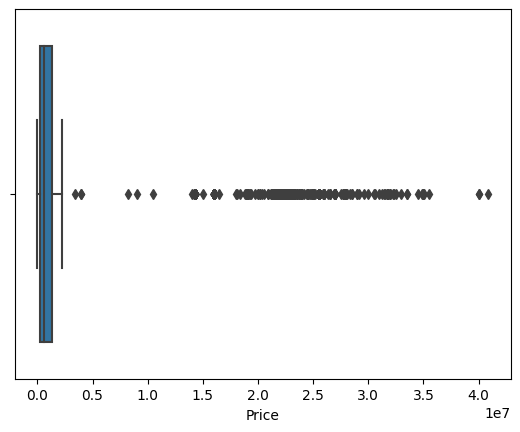

In [46]:
sns.boxplot(x=sorted_df['Price'])

# Membersihkan dataset dari Outliers yang ada menggunakan metode IQR

Pada bagian dibawah kita melakukan pembersihan outliers pada dataset yang telah didapatkan dengan kata kunci "iphone 15 pro max" menggunakan metode IQR (Interquartile Range)

Terlihat bahwa setelah dilakukan pembersihan outliers, jumlah baris yang tersisa adalah 3724 baris yang semula berjumlah 4522 baris

In [50]:
Q1 = sorted_df['Price'].quantile(0.25)
Q3 = sorted_df['Price'].quantile(0.75)

IQR=Q3-Q1
cleaned_df=sorted_df[~((sorted_df['Price']<(Q1-1.5*IQR))|(sorted_df['Price']>(Q3+1.5*IQR)))]
 
cleaned_df.shape

(3724, 8)

# Melihat informasi statistik deskriptif dari dataset yang telah digabungkan dan dibersihkan dari outliers

dapat dilihat bahwa rata-rata harga adalah Rp 582,271 dan rata-rata rating adalah 0.78 berdasarkan analisis terhadap dataset yang didapatkan dari kata kunci "iphone 15 pro max"
hal ini dapat dikatakan normal dikarenakan terdapat banyak produk aksesoris yang memiliki harga yang sangat murah serta produk dengan rating rendah bahkan 0 yang terdapat pada hasil pencarian dengan kata kunci "iphone 15 pro max" yang dilakukan pada marketplace blibli, tokopedia, dan bukalapak

In [52]:
cleaned_df.describe()

,Price,Rating
count,3.724000e+03,3724.000000
mean,5.822710e+05,0.780612
std,4.415113e+05,1.809933
min,5.000000e+03,0.000000
25%,2.103750e+05,0.000000
50%,4.350000e+05,0.000000
75%,9.500000e+05,0.000000
max,2.200000e+06,5.000000
